In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
traffic_data = pd.read_csv("dataset\RTA Dataset.csv")

In [4]:
traffic_data.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
traffic_data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
traffic_data.shape

(12316, 32)

In [7]:
traffic_data_cleaned = pd.read_csv("dataset\cleaned.csv")
traffic_data_cleaned.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [8]:
traffic_data_cleaned.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')>

In [9]:
traffic_data_cleaned['Accident_severity'].unique()

print(traffic_data_cleaned['Accident_severity'].value_counts())


Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64


In [10]:
traffic_data_cleaned['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown'],
      dtype=object)

In [11]:
traffic_data_cleaned['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', 'Unknown', 'Fog or mist'], dtype=object)

In [12]:
traffic_data_cleaned['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [13]:
traffic_data_cleaned['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [14]:
traffic_data_cleaned['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

In [15]:
traffic_data_cleaned.info

<bound method DataFrame.info of       Age_band_of_driver Sex_of_driver   Educational_level  \
0                  18-30          Male   Above high school   
1                  31-50          Male  Junior high school   
2                  18-30          Male  Junior high school   
3                  18-30          Male  Junior high school   
4                  18-30          Male  Junior high school   
...                  ...           ...                 ...   
12311              31-50          Male             Unknown   
12312            Unknown          Male   Elementary school   
12313            Over 51          Male  Junior high school   
12314              18-30        Female  Junior high school   
12315              18-30          Male  Junior high school   

      Vehicle_driver_relation Driving_experience  \
0                    Employee              1-2yr   
1                    Employee         Above 10yr   
2                    Employee              1-2yr   
3              

In [16]:
traffic_data_cleaned.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

Text(0, 0.5, 'Count')

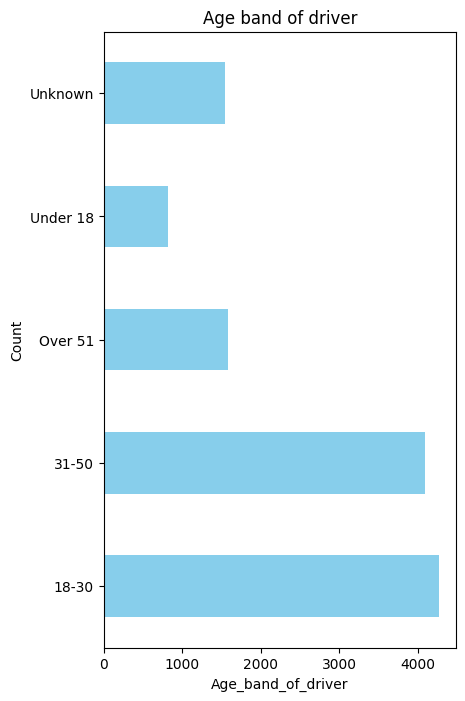

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)  
traffic_data_cleaned['Age_band_of_driver'].value_counts().sort_index().plot(kind='barh',color='skyblue')
plt.title("Age band of driver")
plt.xlabel('Age_band_of_driver')
plt.ylabel('Count')


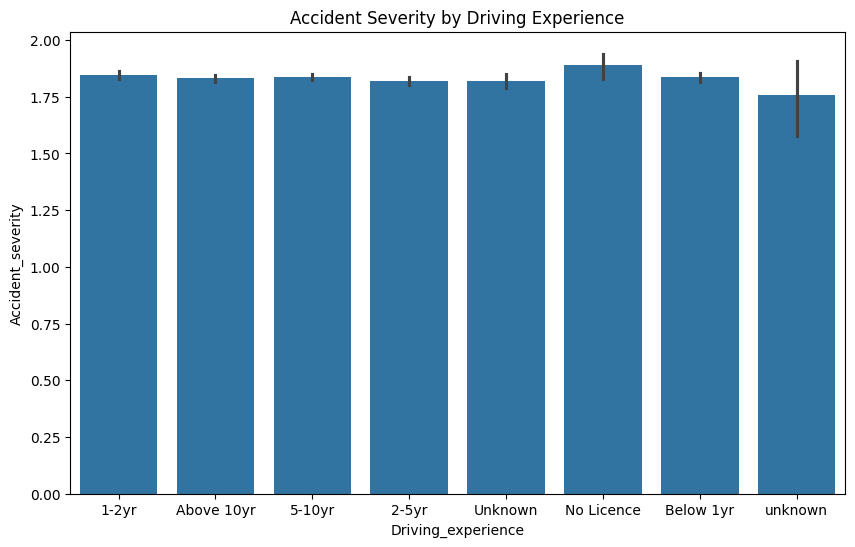

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Driving_experience', y='Accident_severity', data=traffic_data_cleaned)
plt.title('Accident Severity by Driving Experience')
plt.show()


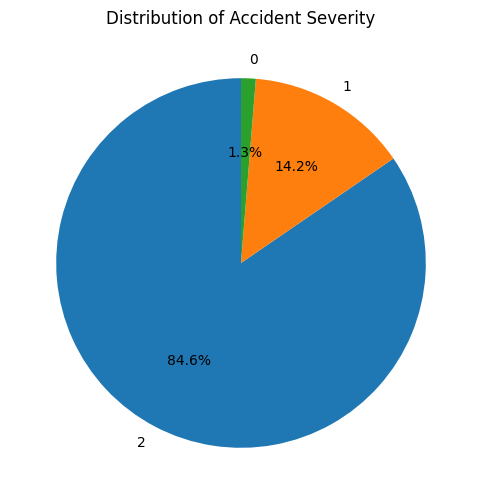

In [19]:
plt.figure(figsize=(8, 6))
traffic_data_cleaned['Accident_severity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accident Severity')
plt.ylabel('')
plt.show()


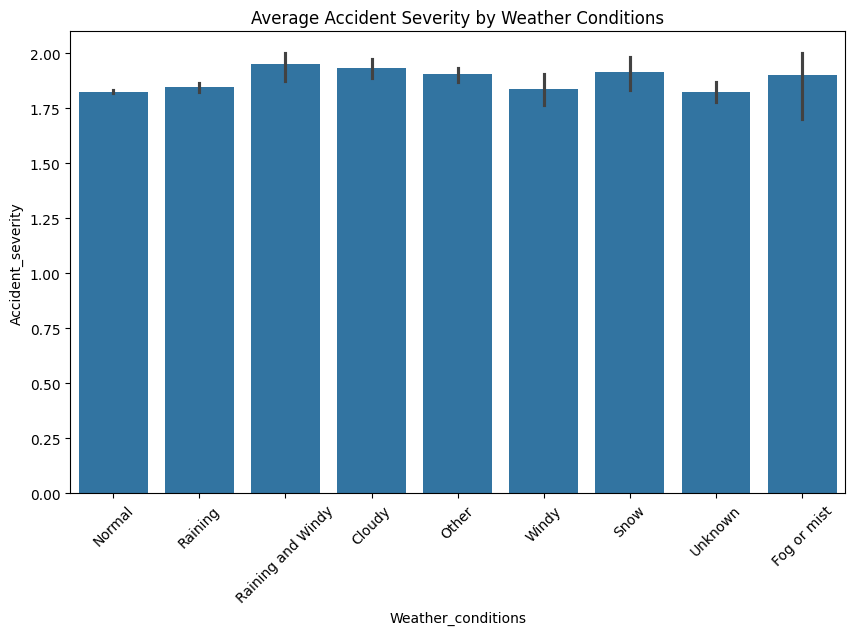

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_conditions', y='Accident_severity', data=traffic_data_cleaned, estimator=np.mean)
plt.title('Average Accident Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()


In [21]:
traffic_data_cleaned.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [22]:
traffic_data_cleaned['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', 'Unknown',
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [23]:

traffic_data_cleaned[['Weather_conditions','Accident_severity']].value_counts().head()

Weather_conditions  Accident_severity
Normal              2                    8454
                    1                    1474
Raining             2                    1150
Other               2                     268
Unknown             2                     241
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=traffic_data_cleaned.apply(LE.fit_transform)
df_cat_to_int = pd.DataFrame(df)
df_cat_to_int.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,0,0,5,1,0,3,2,3,2,5,9,2
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16,2
2,0,1,4,0,0,6,1,0,3,2,2,2,5,0,1
3,0,1,4,0,2,6,7,2,0,2,8,2,5,1,2
4,0,1,4,0,1,6,7,0,0,2,8,2,5,16,2


<Axes: >

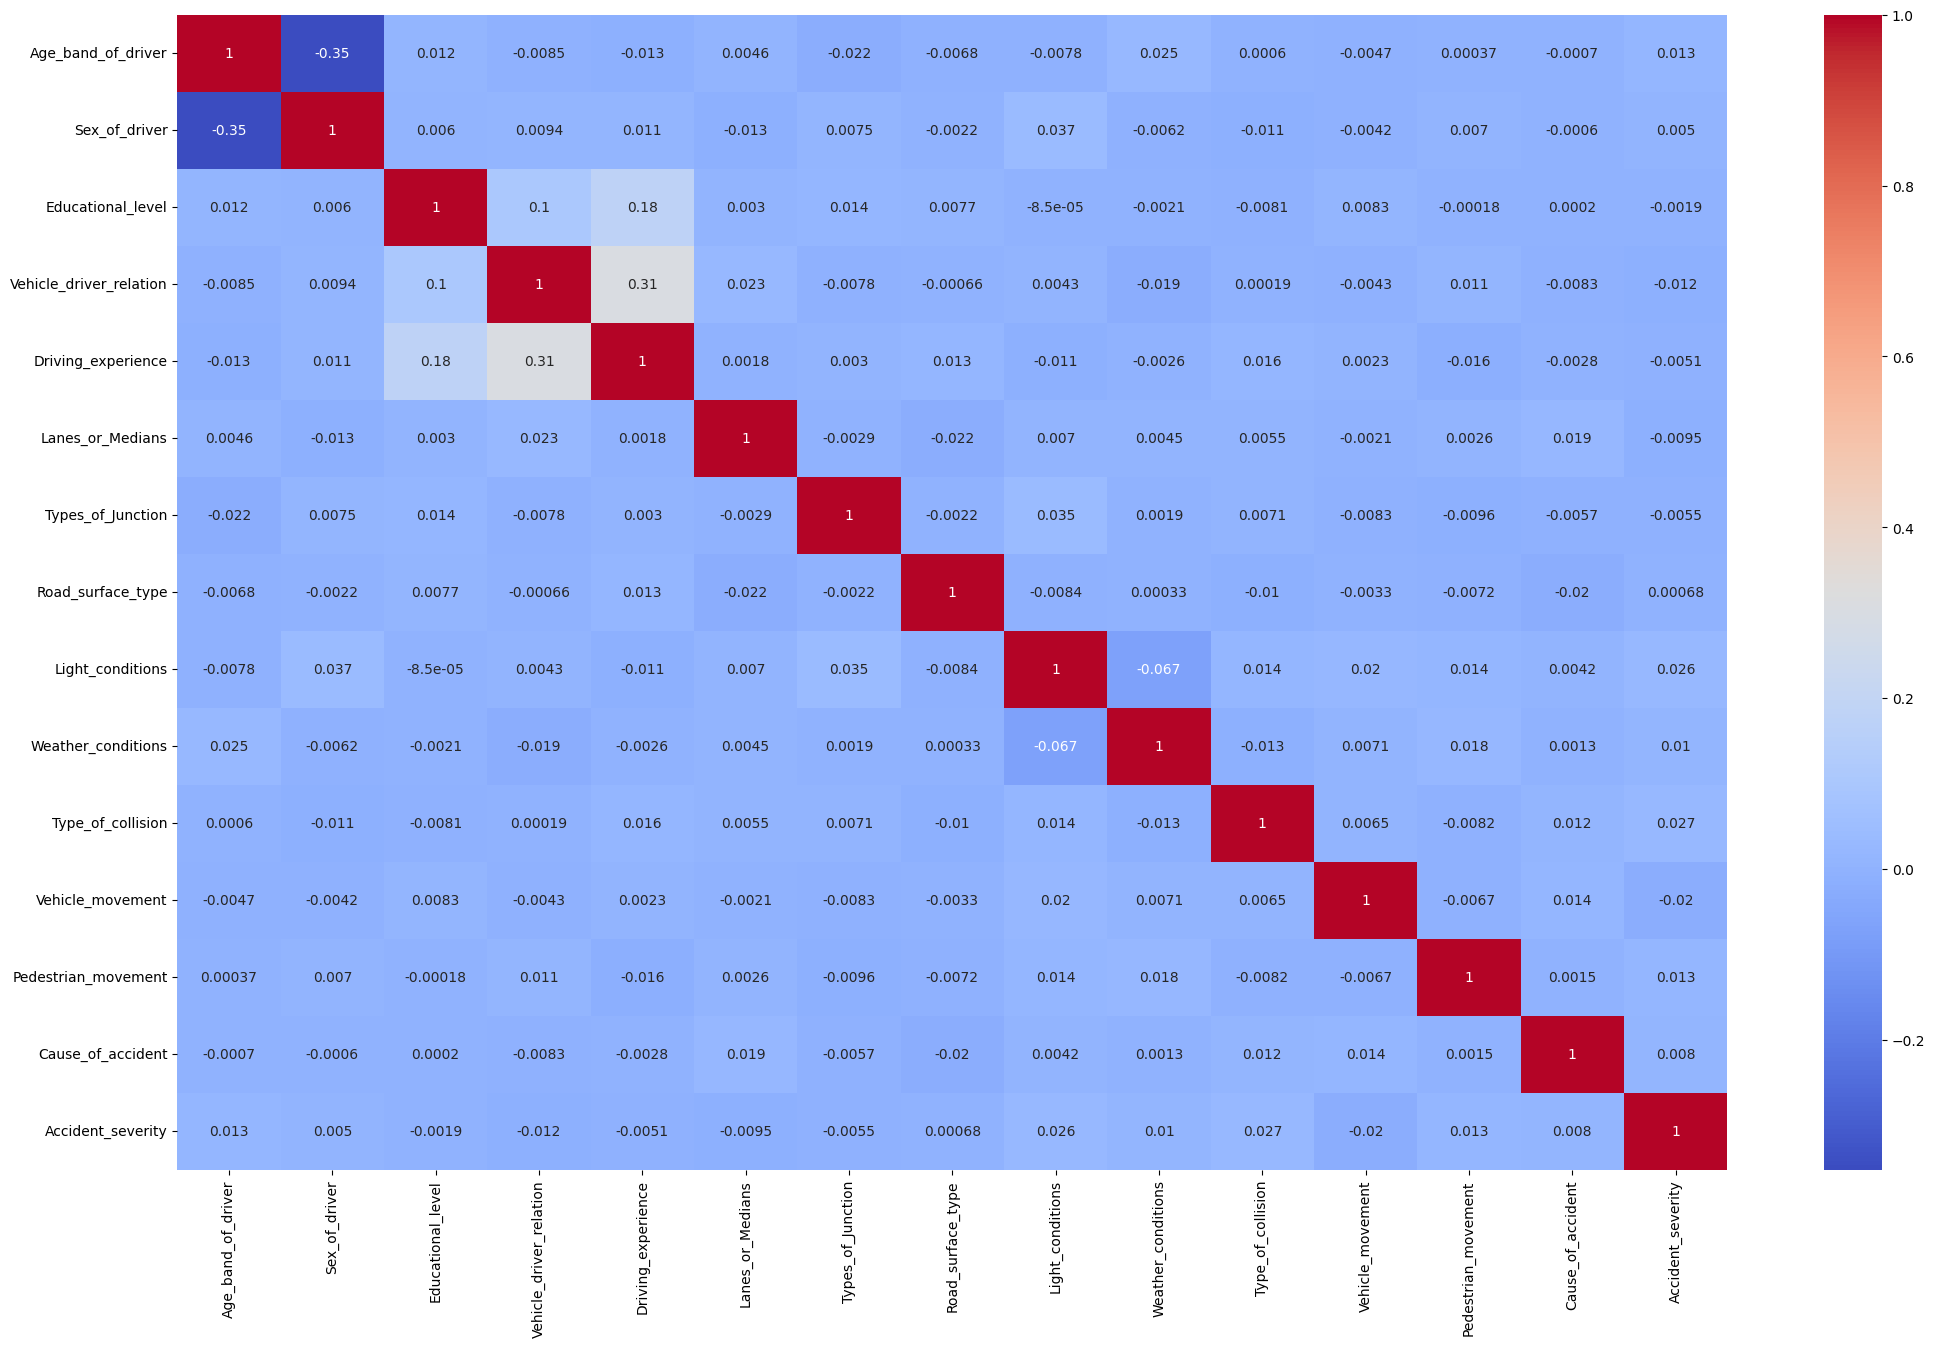

In [25]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Model Building and Tuning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation and Metrics
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    f1_score, 
    roc_curve, 
    precision_score, 
    recall_score
)

# Cross-validation and Hyperparameter Tuning
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings('ignore')


In [27]:

x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 14) (3695, 14) (8621,) (3695,)


In [36]:

x = df[['Age_band_of_driver','Driving_experience','Weather_conditions','Type_of_collision','Cause_of_accident']]
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 5) (3695, 5) (8621,) (3695,)


In [41]:
print(y.value_counts())

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64


In [42]:
logistic_regression_model = LogisticRegression(max_iter=1000, class_weight='balanced')


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model.fit(X_train_scaled, y_train)
y_pred = logistic_regression_model.predict(X_test_scaled)


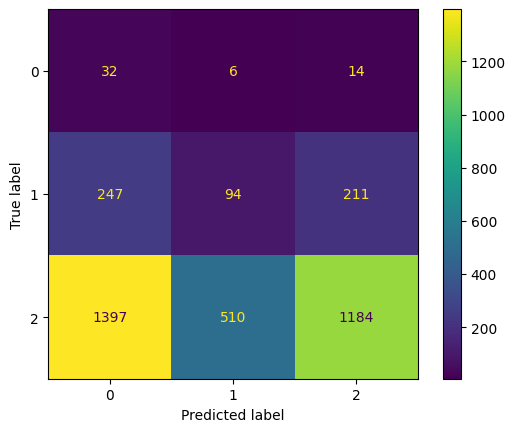

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logistic_regression_model, X_test_scaled, y_test)
plt.show()


In [47]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create and train Logistic Regression model with balanced class weights
logistic_regression_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_regression_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the scaled test set
y_pred = logistic_regression_model.predict(X_test_scaled)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Save the trained Logistic Regression model and scaler
models_dir = 'models_pickle_file'
os.makedirs(models_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save the Logistic Regression model
model_file = os.path.join(models_dir, 'logistic_regression_model.pkl')
with open(model_file, 'wb') as f:
    pickle.dump(logistic_regression_model, f)

# Save the scaler
scaler_file = os.path.join(models_dir, 'scaler.pkl')
with open(scaler_file, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Saved Logistic Regression model to {model_file}")
print(f"Saved Scaler to {scaler_file}")



Logistic Regression Accuracy: 0.3545
              precision    recall  f1-score   support

           0       0.02      0.62      0.04        52
           1       0.15      0.17      0.16       552
           2       0.84      0.38      0.53      3091

    accuracy                           0.35      3695
   macro avg       0.34      0.39      0.24      3695
weighted avg       0.73      0.35      0.46      3695

Confusion Matrix:
 [[  32    6   14]
 [ 247   94  211]
 [1397  510 1184]]
Saved Logistic Regression model to models_pickle_file\logistic_regression_model.pkl
Saved Scaler to models_pickle_file\scaler.pkl


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest model
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.6070


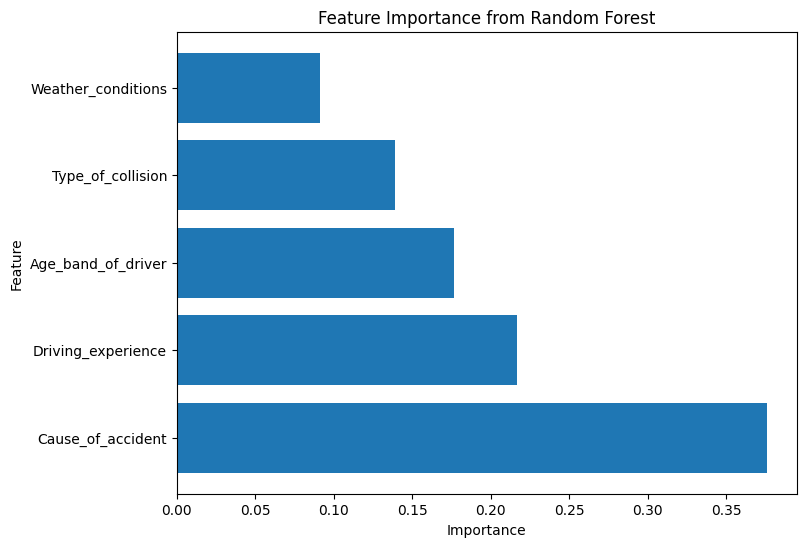

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Assuming your feature names are in the following order
features = ['Age_band_of_driver', 'Driving_experience', 'Weather_conditions', 'Type_of_collision', 'Cause_of_accident']

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [52]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned Random Forest model
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Accuracy: {best_rf_accuracy:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8363


In [53]:
import os
import pickle

# Save the tuned Random Forest model
model_file = os.path.join('models_pickle_file', 'tuned_random_forest_model.pkl')
with open(model_file, 'wb') as f:
    pickle.dump(best_rf_model, f)  # Assuming `best_rf_model` is your tuned model

print(f"Saved Tuned Random Forest model to {model_file}")


Saved Tuned Random Forest model to models_pickle_file\tuned_random_forest_model.pkl


Error training Random Forest: could not convert string to float: '31-50'
Error training Support Vector Machine: could not convert string to float: '31-50'
Error training Logistic Regression: could not convert string to float: '31-50'
Error training Decision Tree: could not convert string to float: '31-50'


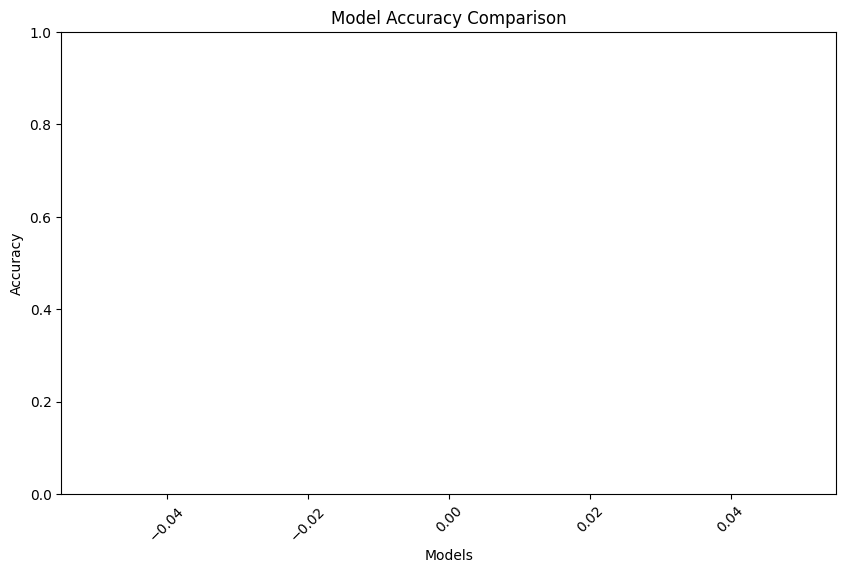

In [35]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the models
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier()
}

# Directory to save the models
models_dir = 'models_pickle_file'
os.makedirs(models_dir, exist_ok=True)  # Create directory if it doesn't exist

# Create a dictionary to store the results
results = {}

# Train, evaluate, and save each model
for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        
        # Print performance metrics
        print(f"\n{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_test, y_pred))
        
        # Save the model to a pickle file
        model_file = os.path.join(models_dir, f'{name.lower().replace(" ", "_")}_model.pkl')
        with open(model_file, 'wb') as f:
            pickle.dump(model, f)
        print(f"Saved {name} model to {model_file}")
    
    except Exception as e:
        print(f"Error training {name}: {e}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
